<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3_Darek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [176]:
!pip freeze
!pip install pandas==0.23.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

absl-py==0.7.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.0.1
astor==0.7.1
astropy==3.0.5
atari-py==0.1.7
atomicwrites==1.3.0
attrs==19.1.0
audioread==2.1.6
autograd==1.2
Babel==2.6.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
boto3==1.9.140
botocore==1.12.140
Bottleneck==1.2.1
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.0
certifi==2019.3.9
cffi==1.12.3
chainer==5.4.0
chardet==3.0.4
Click==7.0
cloudpickle==0.6.1
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.1.3
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.14.6
cvxopt==1.2.3
cvxpy==1.0.15
cycler==0.10.0
cymem==2.0.2
Cython==0.29.7
cytoolz==0.9.0.1
daft==0.0.4
dask==1.1.5
dataclasses==0.6
datascience==0.10.6
decorator==4.4.0
defusedxml==0.6.0
dill==0.2.9
distributed==1.25.3
Django==2.2.1
dlib==19.16.0
dm-sonnet==1.23
docopt==0.6.2
docutils==0.14
dopamine-rl==1.0.5
easydict==1.9
ecos=

In [0]:
import scipy.stats as stats


## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data")

In [179]:
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [180]:
df.describe(include='object')

,b,30.83,u,g,w,v,t,t.1,f,g.1,00202,+
count,689,689,689,689,689,689,689,689,689,689,689,689
unique,3,349,4,4,15,10,2,2,2,3,170,2
top,b,?,u,g,c,v,t,f,f,g,00000,-
freq,467,12,518,518,137,398,360,395,373,624,132,383


In [0]:
def missing_values(data):
   total = data.isnull().sum()
   percent = data.isnull().sum().sort_values(ascending = False)/len(data)*100
   tp = pd.concat([total, percent], axis=1, keys=['Total', '%'])
   return(np.transpose(tp))

In [182]:
missing_values(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,+,0,0.1,00202,01,1.25,30.83,b,f,g,g.1,t,t.1,u,v,w
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df = df.replace("?", np.NaN)

In [184]:
df.columns.tolist()

['b',
 '30.83',
 '0',
 'u',
 'g',
 'w',
 'v',
 '1.25',
 't',
 't.1',
 '01',
 'f',
 'g.1',
 '00202',
 '0.1',
 '+']

In [0]:
df.columns = ["A1","A2","A3","A4",
              "A5","A6","A7","A8",
              "A9","A10","A11","A12",
              "A13","A14","A15","A16"]

In [186]:
df.sample(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
285,a,NaN,1.500,u,g,ff,ff,0.00,f,t,2,t,g,00200,105,-
555,b,29.58,4.500,u,g,w,v,7.50,t,t,2,t,g,00330,0,+
636,b,19.50,9.585,u,g,aa,v,0.79,f,f,0,f,g,00080,350,-
467,b,22.08,2.335,u,g,k,v,0.75,f,f,0,f,g,00180,0,-
209,b,39.33,5.875,u,g,cc,h,10.00,t,t,14,t,g,00399,0,+
186,b,40.58,5.000,u,g,c,v,5.00,t,t,7,f,g,00000,3065,+
28,b,42.08,1.040,u,g,w,v,5.00,t,t,6,t,g,00500,10000,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
142,b,22.33,11.000,u,g,w,v,2.00,t,t,1,f,g,00080,278,+
677,a,17.92,10.210,u,g,ff,ff,0.00,f,f,0,f,g,00000,50,-


In [187]:
df.A16.describe()

count     689
unique      2
top         -
freq      383
Name: A16, dtype: object

In [0]:
df.A16 =df.A16.replace("+",1).replace("-",0)

In [0]:
a16 = df.A16

In [190]:
a16.describe()

count    689.000000
mean       0.444122
std        0.497229
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A16, dtype: float64

In [0]:
cats =["A1","A4","A5","A6","A7","A9","A10","A12","A13"]

In [0]:
conts = ['A2','A3','A8', 'A11','A14','A15']
df[conts].describe()
df.A2 = df.A2.astype("float")

In [0]:
df.A14 = df.A14.astype("float")

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


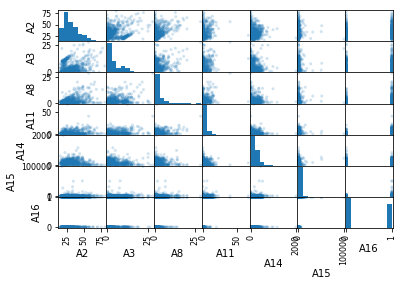

In [214]:
pd.scatter_matrix(df, alpha=0.2);

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


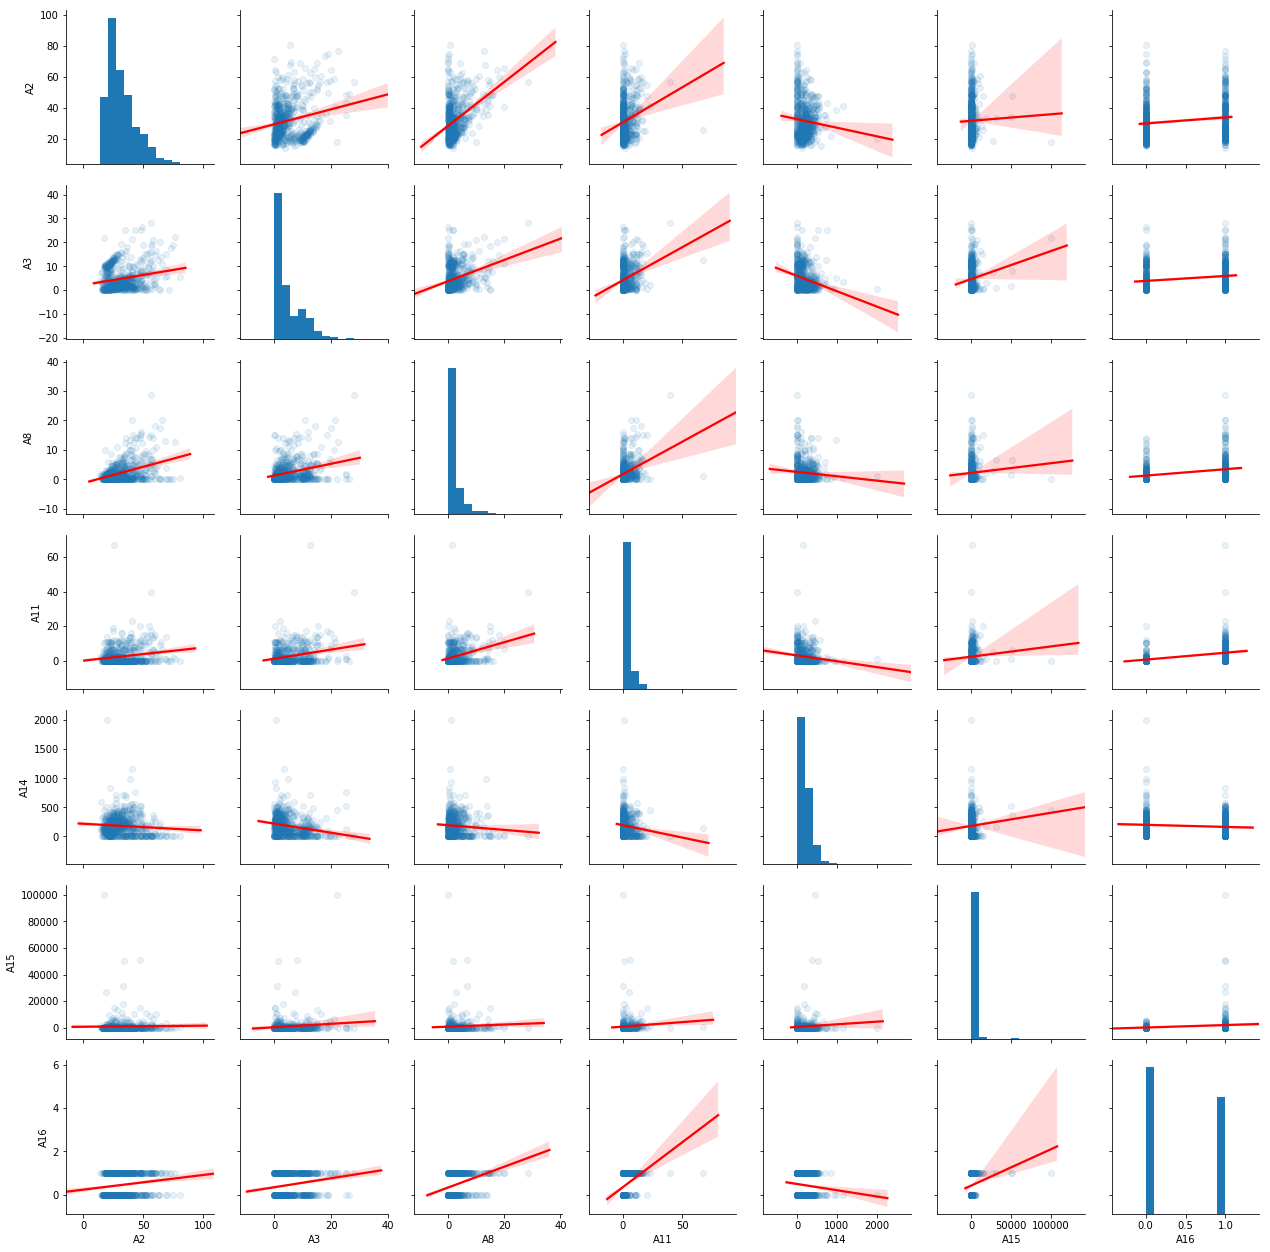

In [212]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [0]:
df2 = df.copy()

In [0]:
def process_numbers(df):
  cut_points = [0,9,19,29,39,49,1000]
  label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
  df2["A11"] = pd.cut(df["A11"],
                      cut_points,labels=label_names)
  return df

In [0]:
process_numbers(df2)

In [345]:
totcross = pd.crosstab(df2['A16'], df2['A11'], margins=True)
totcross


A11,0-9,10-19,20-29,40-49,50+,All
A16,,,,,,
0,79,6,1,0,0,86
1,156,48,2,1,1,208
All,235,54,1,3,1,294


In [346]:
208/294

0.7074829931972789

In [329]:
row_sums = totcross.iloc[[0,1],5].values
row_sums

array([ 86, 208])

In [311]:
col_sums = totcross.iloc[2,[0,1,2,3,4,5]].values
col_sums

array([235,  54,   1,   3,   1, 294])

In [312]:
total = totcross.loc['All', 'All']
print("Total number of observations:", total)

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
print(np.array(expected))

Total number of observations: 294
[[ 68.7414966   15.79591837   0.29251701   0.87755102   0.29251701
   86.        ]
 [166.2585034   38.20408163   0.70748299   2.12244898   0.70748299
  208.        ]]


In [335]:
tv = totcross.values
tv
tv.shape

(2, 5)

In [0]:
chi_squared = ((tv - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

In [0]:
df3 = df.copy()

In [0]:
process_numbers(df3)

In [0]:
def process_numbers(df):
  cut_points = [0,9,19,29,39,49,1000]
  label_names = ["0-9","10-19","20-29","30-39","40-49","50+"]
  df3["A4"] = pd.cut(df3["A4"],
                      cut_points,labels=label_names)
  return df

In [320]:
totcross2 = pd.crosstab(df2['A16'], df2['A4'], margins=True)
totcross2

A4,l,u,y,All
A16,,,,
0,0,263,118,381
1,2,255,45,302
All,2,518,163,683


In [344]:
381/683


0.5578330893118595

In [0]:
row_sums2 = totcross.iloc[[0,1],4].values

In [323]:
col_sums2 = totcross.iloc[2,[0,1,2,3,4,5]].values
col_sums2

array([235,  54,   1,   3,   1, 294])

In [324]:
tota2l = totcross2.loc['All', 'All']
print("Total number of observations:", total)

expected2 = []
for i in range(len(row_sums2)):
  expected_row = []
  for column in col_sums2:
    expected_val = column*row_sums2[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
print(np.array(expected))

Total number of observations: 294
[[6.87414966e+01 1.57959184e+01 2.92517007e-01 8.77551020e-01
  2.92517007e-01 8.60000000e+01]
 [1.66258503e+02 3.82040816e+01 7.07482993e-01 2.12244898e+00
  7.07482993e-01 2.08000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.99319728e-01 1.83673469e-01 3.40136054e-03 1.02040816e-02
  3.40136054e-03 1.00000000e+00]]


In [338]:
tv2 = totcross2.values
tv2
tv2.shape

(3, 4)

In [0]:
chi_squared = ((tv2 - expected)**2/(expected)).sum()
print(f"Chi-Squared: {chi_squared}")

In [193]:
df.corr()


,A2,A3,A8,A11,A14,A15,A16
A2,1.000000,0.202367,0.395750,0.185897,-0.079802,0.018536,0.163129
A3,0.202367,1.000000,0.298714,0.271003,-0.224249,0.122935,0.208171
A8,0.395750,0.298714,1.000000,0.322247,-0.077123,0.051267,0.323260
A11,0.185897,0.271003,0.322247,1.000000,-0.120060,0.063616,0.407270
A14,-0.079802,-0.224249,-0.077123,-0.120060,1.000000,0.066885,-0.101200
A15,0.018536,0.122935,0.051267,0.063616,0.066885,1.000000,0.176138
A16,0.163129,0.208171,0.323260,0.407270,-0.101200,0.176138,1.000000


In [194]:
df.set_index("A16")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,1


In [206]:
 
pvalz =(scipy.stats.ttest_1samp(df['A15'], .5, nan_policy='omit'))
print(pvalz)

Ttest_1sampResult(statistic=5.126986983767037, pvalue=3.8310871510295806e-07)


In [0]:
pos = df[df.A16 == 1]
neg = df[df.A16 == 0]

(306, 16)

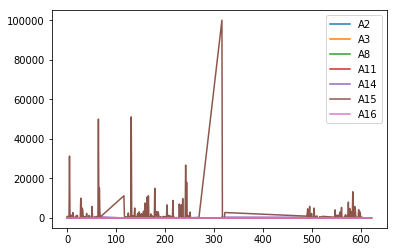

In [207]:
pos.plot()
pos.shape

In [0]:
pd.scatter_matrix(pos, alpha=.02);

In [199]:
pos.A15.value_counts()
pos.A15.head()

0    560
1    824
2      3
3      0
4      0
Name: A15, dtype: int64

(383, 16)

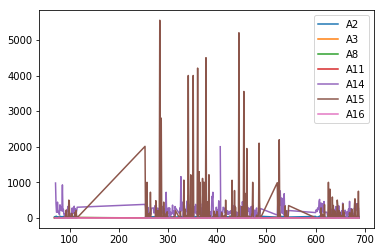

In [200]:
neg.plot()
neg.shape


In [201]:
pos.describe()

,A2,A3,A8,A11,A14,A15,A16
count,304.000000,306.000000,306.000000,306.000000,300.000000,306.000000,306.0
mean,33.730000,5.924248,3.435016,4.617647,164.296667,2045.522876,1.0
std,12.829683,5.469973,4.125652,6.327215,162.026347,7671.419484,0.0
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000,1.0
50%,30.335000,4.460000,2.000000,3.000000,120.000000,227.500000,1.0
75%,41.352500,9.530000,5.000000,7.000000,280.000000,1209.500000,1.0
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000,1.0


In [202]:
pos.set_index("A16")
stats.ttest_1samp(pos['A15'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=4.6643305764631116, pvalue=4.638977761875466e-06)

In [203]:
stats.ttest_1samp(pos['A11'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=11.384060942516108, pvalue=2.9270890600074304e-25)

In [204]:
neg.describe(include="object")
neg.describe()
neg.set_index("A16")
stats.ttest_1samp(neg['A15'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=5.787283914053776, pvalue=1.4923508038203516e-08)

In [205]:
stats.ttest_1samp(neg['A3'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=15.068962886128801, pvalue=1.3340212686882321e-40)

In [342]:
for x in conts:
  print(x)
  pvals =(scipy.stats.ttest_1samp(pos[x], 0, nan_policy='omit'))
  print(pvals)
  print(pvals[1])
  if float(pvals[1]) > 0.05:
    print("Due to the insignificant p-value we would FAIL TO REJECT..")

A2
Ttest_1sampResult(statistic=45.83921785402205, pvalue=2.573311378371366e-138)
2.573311378371366e-138
A3
Ttest_1sampResult(statistic=18.945617970316587, pvalue=1.8759795934810054e-53)
1.8759795934810054e-53
A8
Ttest_1sampResult(statistic=14.56454658522849, pvalue=7.641890199383134e-37)
7.641890199383134e-37
A11
Ttest_1sampResult(statistic=12.766411199821636, pvalue=3.402176414506373e-30)
3.402176414506373e-30
A14
Ttest_1sampResult(statistic=17.563203732089676, pvalue=6.106677898747754e-48)
6.106677898747754e-48
A15
Ttest_1sampResult(statistic=4.6643305764631116, pvalue=4.638977761875466e-06)
4.638977761875466e-06


In [209]:
for x in conts:
  print(x)
  pvals =(scipy.stats.ttest_1samp(neg[x], 0.5, nan_policy='omit'))
  print(pvals)
  print(pvals[1])
  if float(pvals[1]) > 0.05:
    print("Due to the insignificant p-value we would FAIL TO REJECT..")

A2
Ttest_1sampResult(statistic=51.838159509119116, pvalue=2.7696876994315467e-172)
2.7696876994315467e-172
A3
Ttest_1sampResult(statistic=15.068962886128801, pvalue=1.3340212686882321e-40)
1.3340212686882321e-40
A8
Ttest_1sampResult(statistic=6.995051170689755, pvalue=1.1936831195754194e-11)
1.1936831195754194e-11
A11
Ttest_1sampResult(statistic=1.3580856177707235, pvalue=0.17523808826084886)
0.17523808826084886
Due to the insignificant p-value we would FAIL TO REJECT..
A14
Ttest_1sampResult(statistic=21.274058869902017, pvalue=1.9305575371234623e-66)
1.9305575371234623e-66
A15
Ttest_1sampResult(statistic=5.772714134263314, pvalue=1.6160412586061775e-08)
1.6160412586061775e-08


In [210]:
for x in conts:
  print(x)
  pvals =(scipy.stats.ttest_ind(pos[x], neg[x], nan_policy='omit'))
  print(pvals)
  print(pvals[1])
  if float(pvals[1]) > 0.05:
    print("Due to the insignificant p-value we would FAIL TO REJECT..")

A2
Ttest_indResult(statistic=4.295769602362607, pvalue=1.9966966407405674e-05)
1.9966966407405674e-05
A3
Ttest_indResult(statistic=5.5785223709472715, pvalue=3.490724496507552e-08)
3.490724496507552e-08
A8
Ttest_indResult(statistic=8.953578558992847, pvalue=3.188202861884123e-18)
3.188202861884123e-18
A11
Ttest_indResult(statistic=11.688107254939139, pvalue=6.519842491876911e-29)
6.519842491876911e-29
A14
Ttest_indResult(statistic=-2.6408733636831654, pvalue=0.008460849261398617)
0.008460849261398617
A15
Ttest_indResult(statistic=4.69003486307862, pvalue=3.296216085672561e-06)
3.296216085672561e-06


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

I failed to reject a nul hypothesis that there was an even split betwen data in the negative class attribute of the A16 column when comparing the A11 continuos figure at a .05 pvalue.

In all positive class attributes of the A16 I would have to reject a null hypothesis that there is no correlation between the figures and the classification.

Additionally when comparing means between both the negative and positive A16 attributes, I discovered that at the  pvalue of .05 all continuous attritrbutes reveal that we must reject the null hypothesis that there is no correlation between the data and the means.
My first results of the expected values between the A16 and A11 categorical information reveal a stark disproportianate number of positive A16 attributes within the 0-9	10-19 A11 data. However when compared to an expected 77% ratio the rest of the categories seem underrepresented by the positive A16 atribute.

The second chi squared test in the overall data frame reveals an expected ratio of about 0.557 of positve class atributes of the A16 class for the A4 categorical data. This is not represented in the A4 y category as expected in the positive A16 attribute class.

